In [130]:
def global_step(x, obj_func, bounds):
    c = 2.0
    y = np.empty((len(x)))
    x = np.array(x) * np.random.uniform(low = 0.8, high = 1.2, size = x.shape)
    for i in range(len(x)):
#        if x[i,1]<-500.0: y[i] = obj_func(np.array([x[i,0],-500 + abs(-500 - x[i,1])]))
#        elif x[i,1]> 500.0: y[i] = obj_func(np.array([ 500 - abs( 500 - x[i,0]),x[i,1]]))
#        elif x[i,0] < -400.0: y[i] = obj_func(np.array([-400 + abs(-400 - x[i,0]),x[i,1]]))  
#        elif x[i,0]> 400.0: y[i] = obj_func(np.array([ 400 - abs( 400 - x[i,0]),x[i,1]]))
#        else: 
        y[i] = schwefel(x[i])
    y  = y -  np.min(y)
    y =  y / np.max(y)
    cov = np.cov(x.T, aweights = 1.0 - (y**c))
    mean= np.mean(x , axis = 0)
    if mean[0] < -400.0: mean[0] = -400.0
    if mean[0] >  400.0: mean[0] =  400.0
    if mean[1] < -500.0: mean[1] = -500.0
    if mean[1] >  500.0: mean[1] =  500.0
    mean = np.array(mean) * np.random.uniform(low = 0.8, high = 1.2, size = mean.shape) 
    offspring = np.random.multivariate_normal(mean, cov, size = len(x))
    return mean,offspring

In [131]:
def schwefel(x,args = None):
    return 418.9829*len(x) - np.sum(x*np.sin(np.sqrt(np.abs(x)))) + 4.0*x[0]

In [132]:
def plot_schwefel(bounds = [[-400,400],[-500,500]], resolution = 100, points = None, deflation_points = None, mean = None):
    X = np.linspace(bounds[0][0], bounds[0][1], resolution)
    Y = np.linspace(bounds[1][0], bounds[1][1], resolution)
    X, Y = np.meshgrid(X, Y)
    s = np.empty((X.shape))

    for i in range(len(X)):
        for j in range(len(Y)):
            s[i,j] = schwefel(np.array([X[i,j],Y[i,j]]))
                
    fig = plt.figure(0)
    a = plt.pcolormesh(X, Y, s, cmap=cm.viridis)
    plt.scatter(x[:,0],x[:,1])
    plt.scatter(mean[0],mean[1])
    plt.colorbar(a)
    plt.show()

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
x = np.random.uniform(low = -400 , high = 500,size = (50,2))

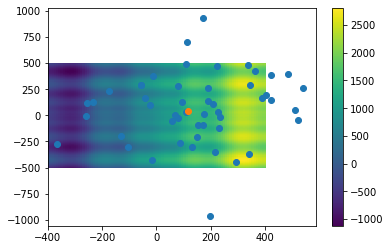

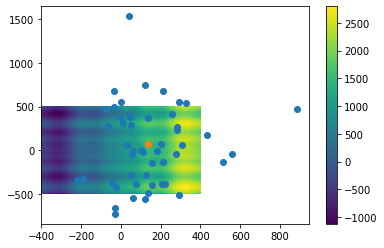

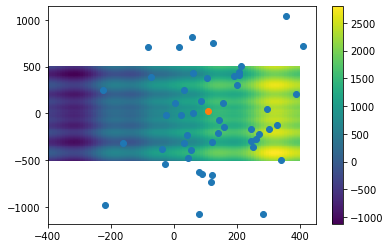

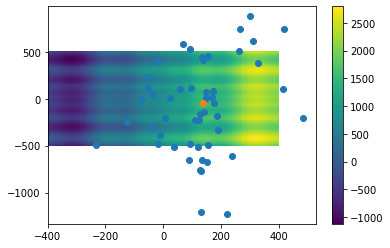

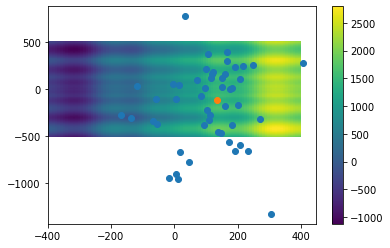

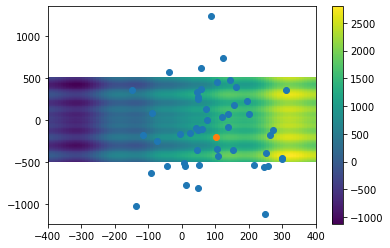

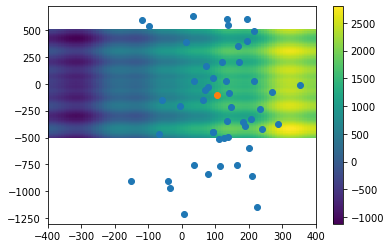

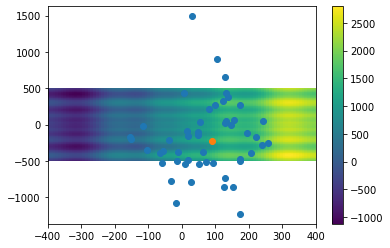

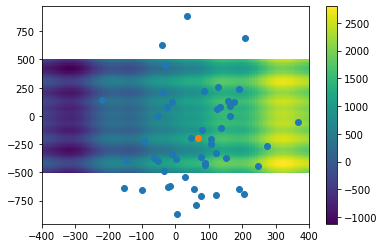

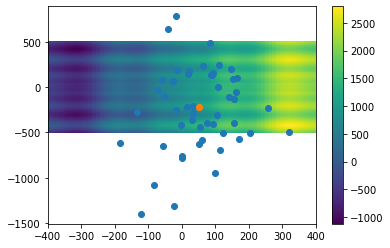

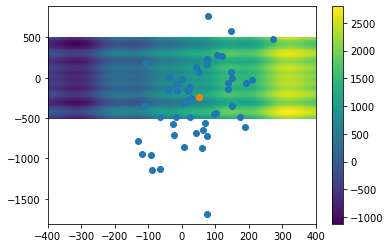

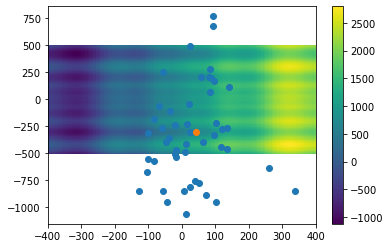

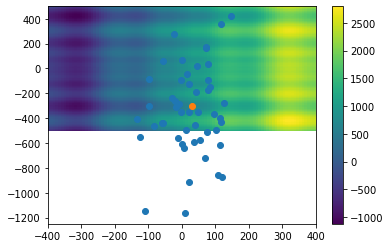

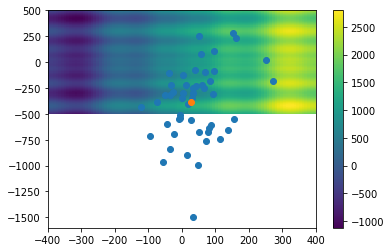

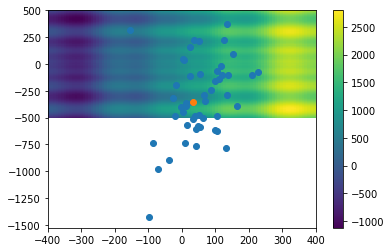

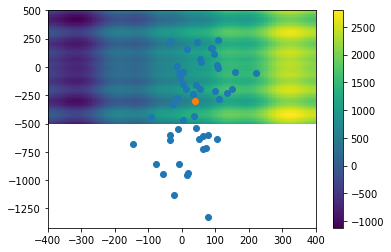

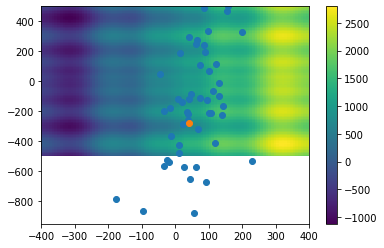

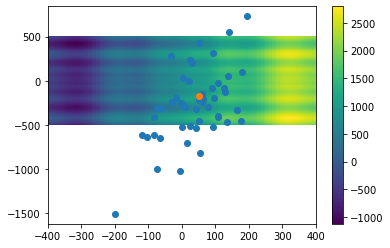

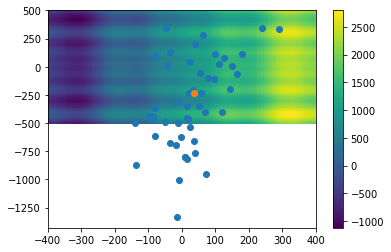

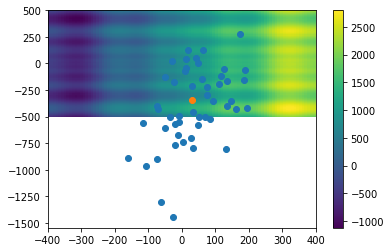

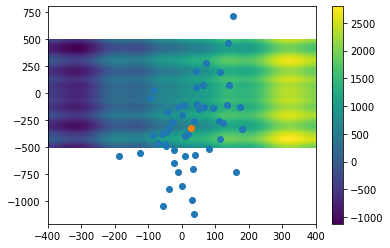

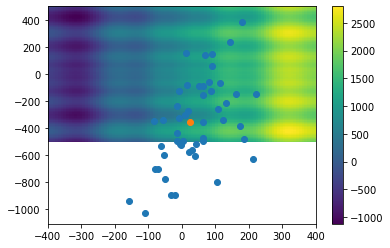

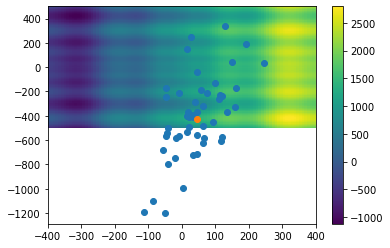

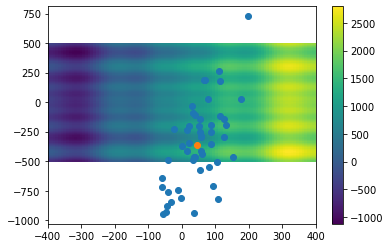

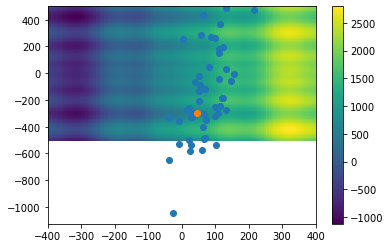

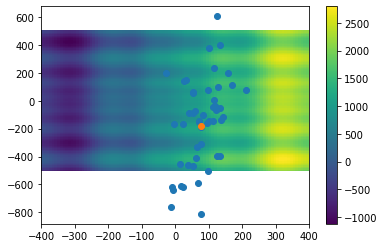

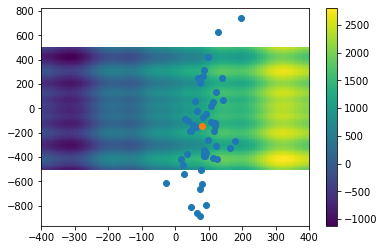

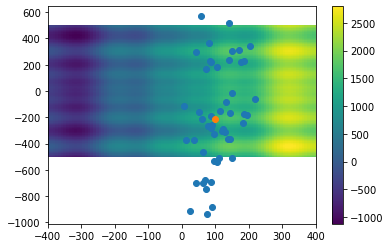

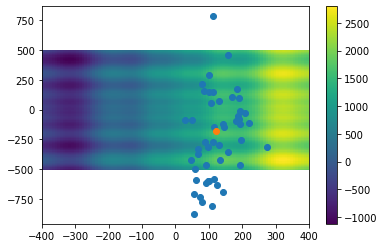

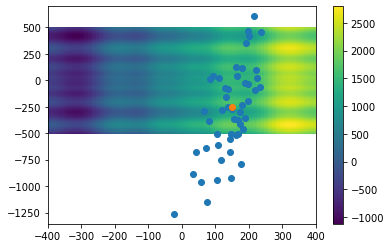

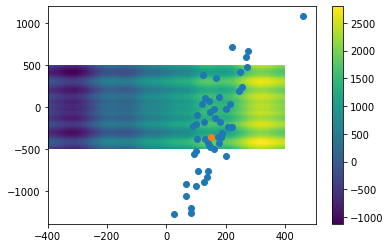

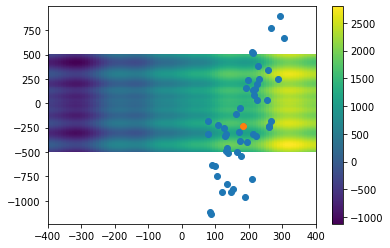

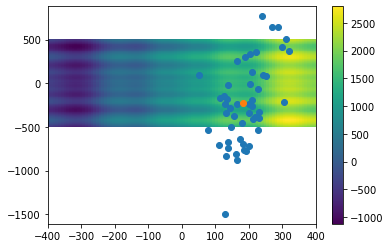

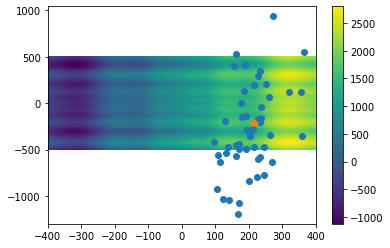

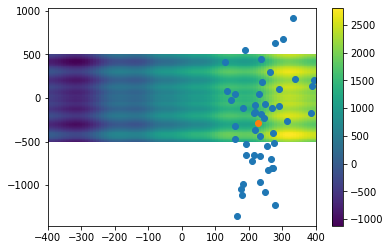

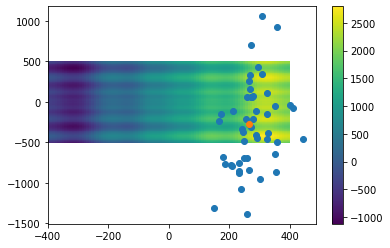

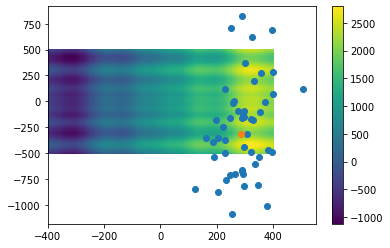

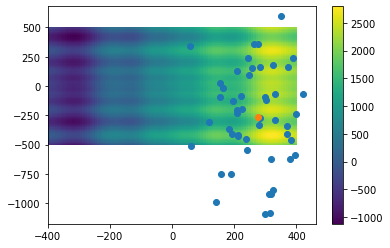

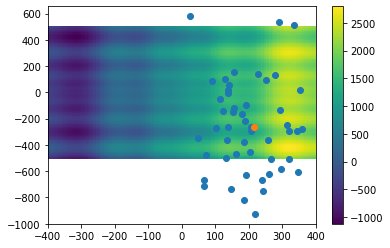

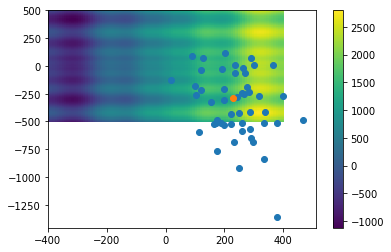

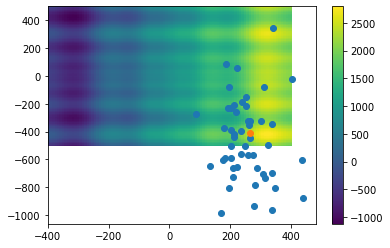

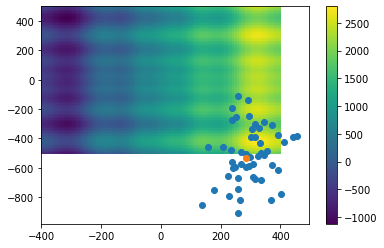

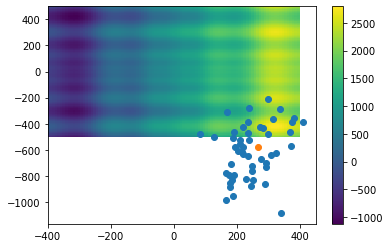

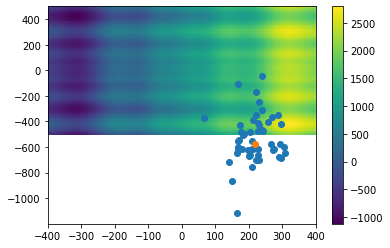

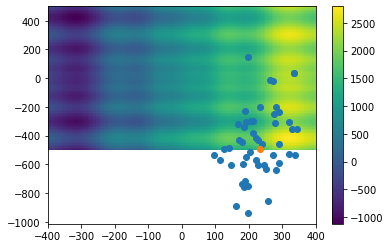

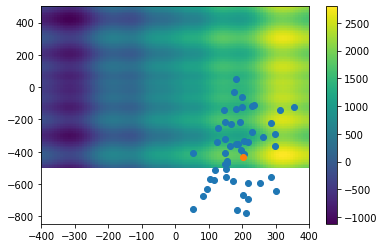

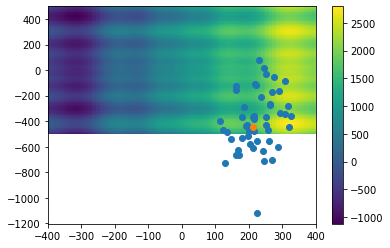

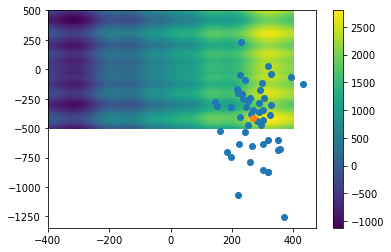

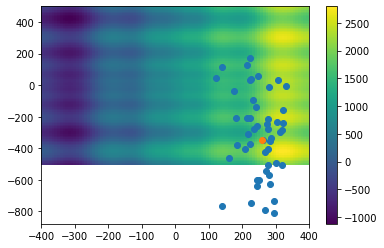

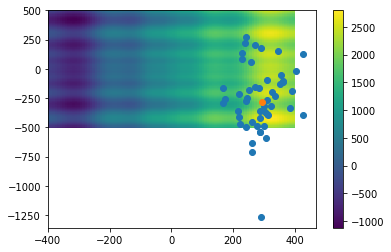

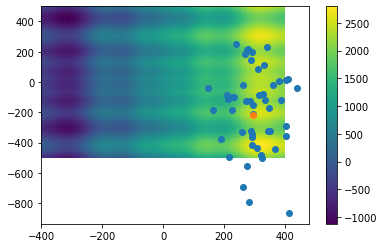

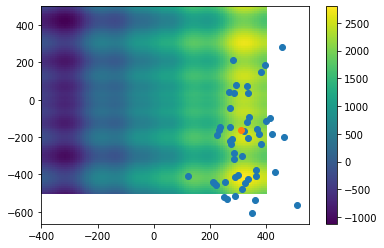

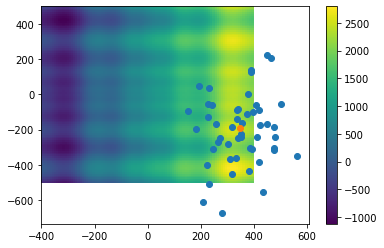

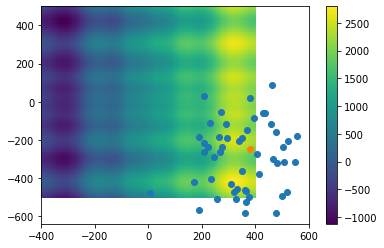

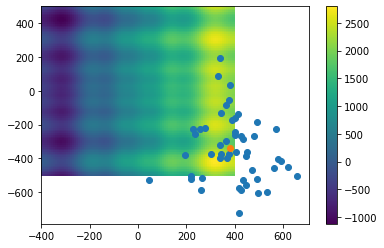

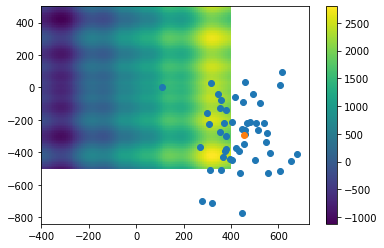

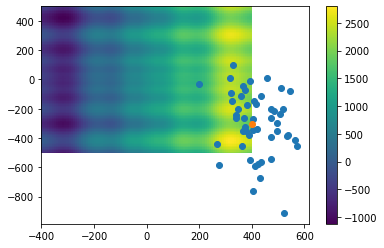

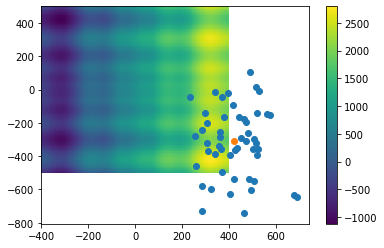

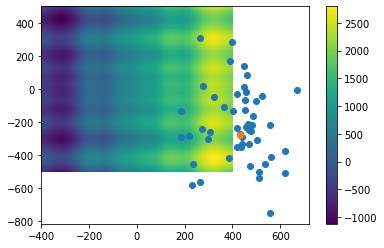

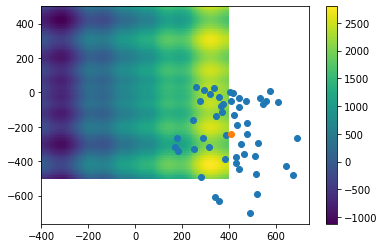

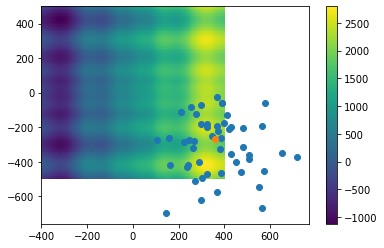

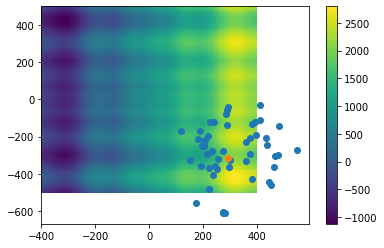

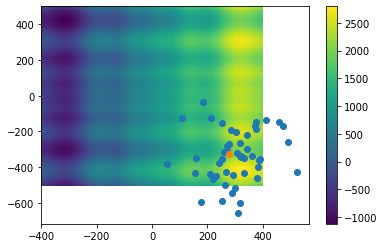

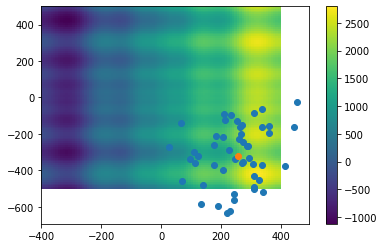

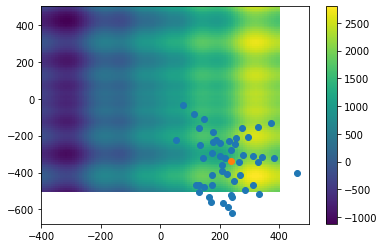

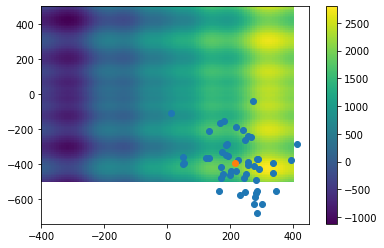

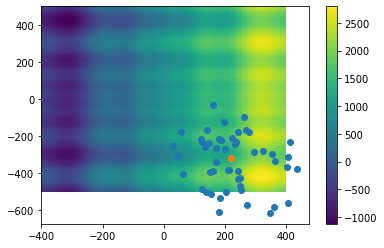

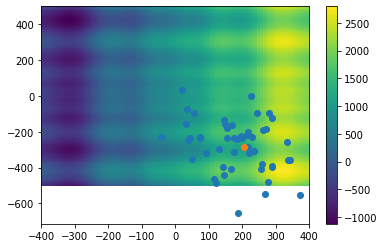

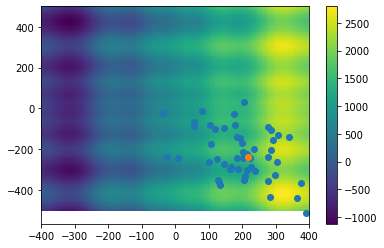

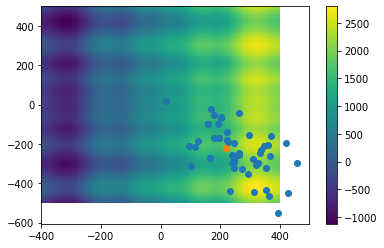

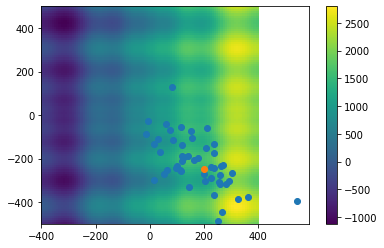

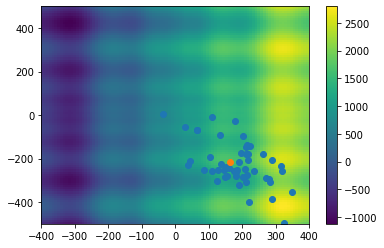

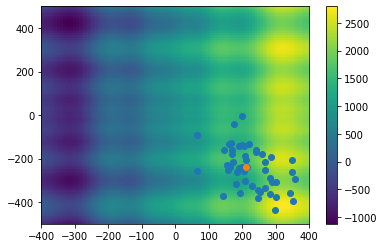

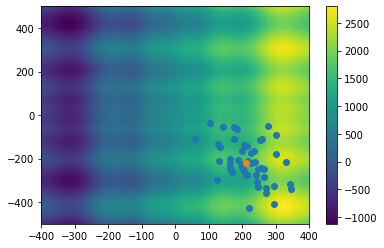

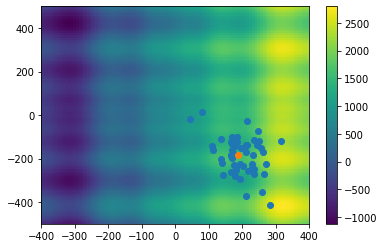

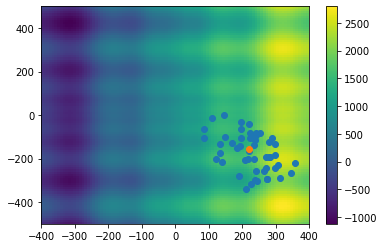

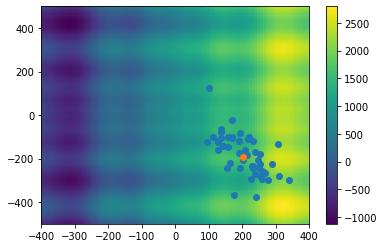

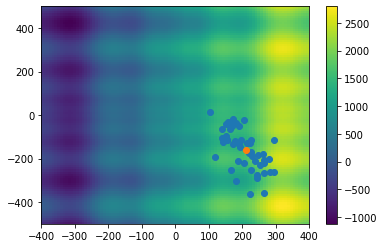

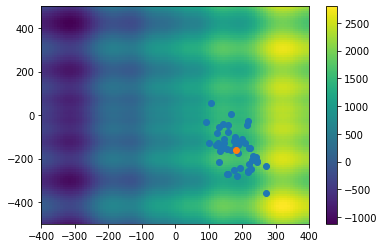

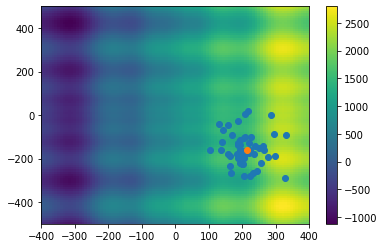

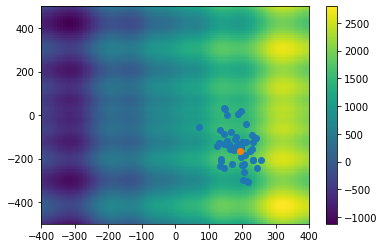

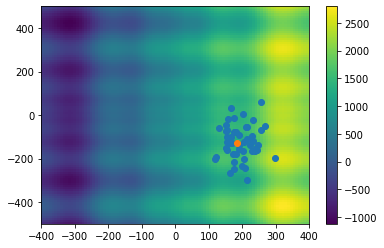

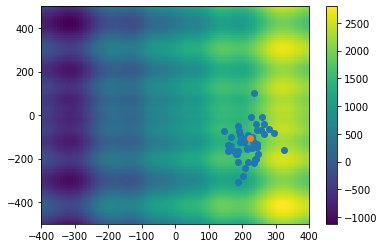

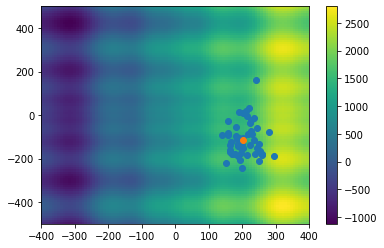

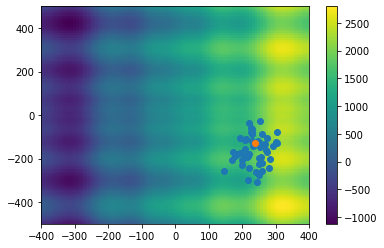

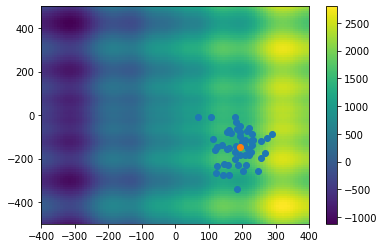

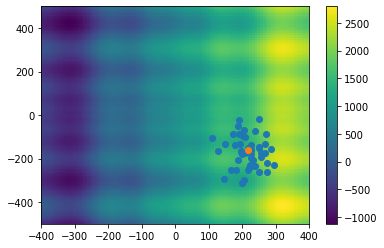

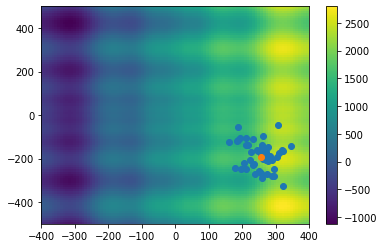

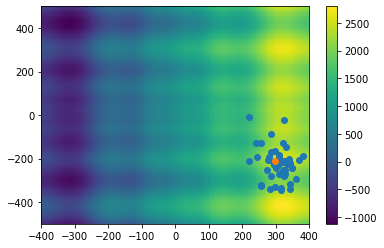

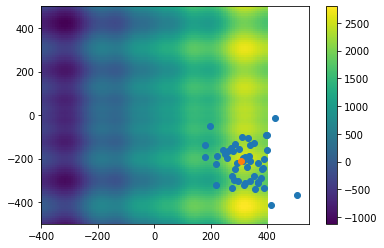

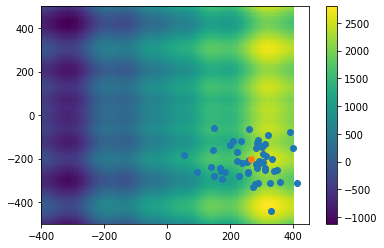

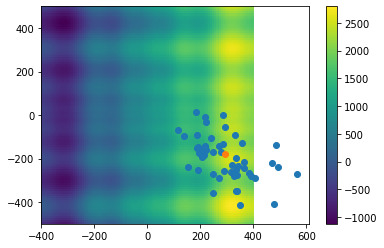

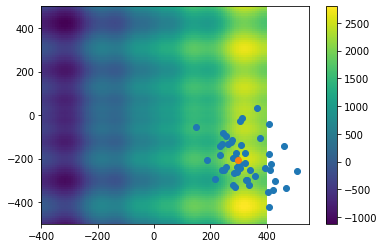

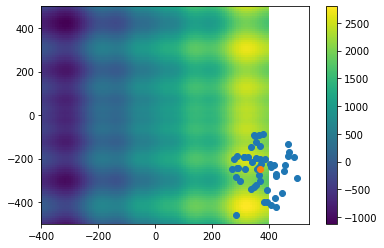

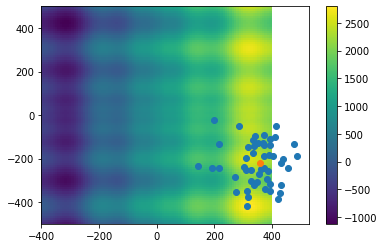

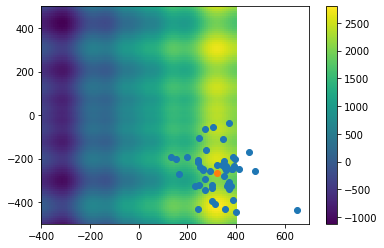

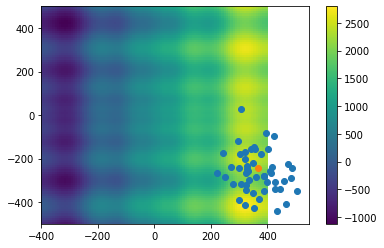

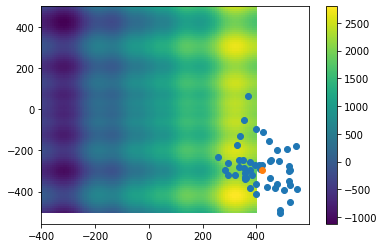

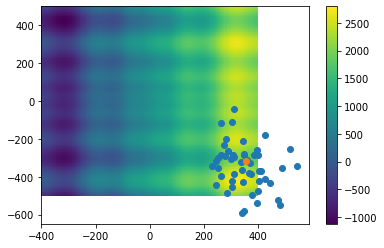

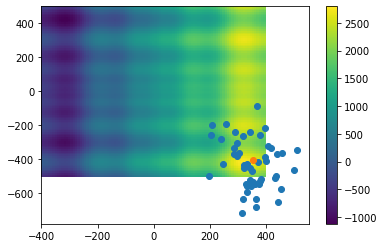

In [134]:
bounds = np.array([[-400,400],[-500,500]])
for i in range(100):
    mean, x = global_step(x,schwefel, bounds)
    plot_schwefel(points = x, mean = mean)